In [1]:
import matplotlib.pyplot as plt

from ripper_lut_net import *
from data.mnist import load_mnist_binary

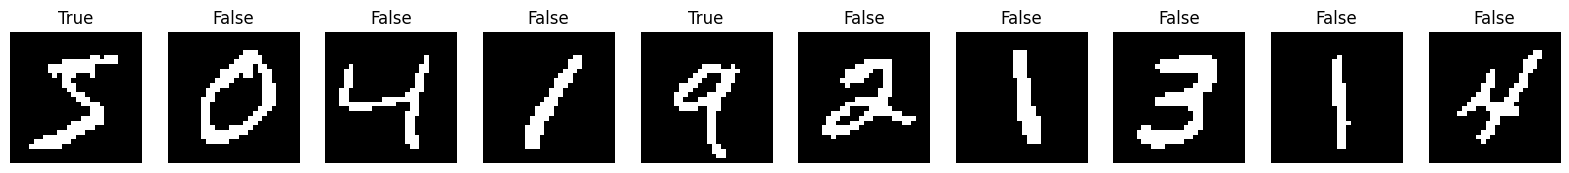

In [2]:
X_train, X_test, y_train, y_test = load_mnist_binary()

# ripper takes extremely long. so I will just use a limited subset of the data
X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:1500]
y_test = y_test[:1500]

fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axs[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(y_train[i])
    axs[i].axis('off')

In [3]:
%%time

# simple test whether it works

lut_bits = 6
num_layers = 5

ripper_net = RipperLut(bits=[lut_bits] * (num_layers + 1), hidden_layers=[32] * num_layers, verbose=True, mode='ripper')
preds_train = ripper_net.train(X_train, y_train)
preds_test = ripper_net.predict(X_test)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|██████████| 5/5 [00:47<00:00,  9.50s/it]


Accuracy on training set: 0.82
Accuracy on test set: 0.76
CPU times: user 1.91 s, sys: 472 ms, total: 2.38 s
Wall time: 51 s


100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Text(0, 0.5, 'Accuracy')

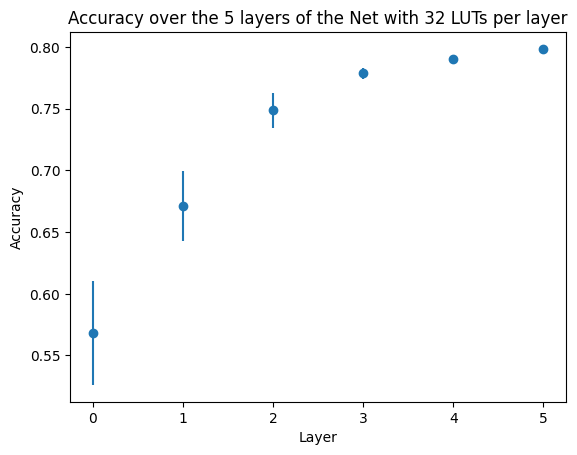

In [4]:
# experiment: accuracies over depth

num_layers = 5
num_layer_luts = 32
nums_lut_bits = 6

ripper_net = RipperLut(bits=[nums_lut_bits] * (num_layers + 1), hidden_layers=[num_layer_luts] * num_layers, verbose=True, mode='ripper')
preds_train = ripper_net.train(X_train, y_train)
preds, accs = ripper_net.get_accuracies_per_layer(X_train, y_train)

mean_accs = [np.mean(acc) for acc in accs]
std_accs = [np.std(acc) for acc in accs]

# plot over layers with std
plt.errorbar(range(num_layers + 1), mean_accs, yerr=std_accs, fmt='o')
plt.title(f"Accuracy over the 5 layers of the Net with {num_layer_luts} LUTs per layer")
plt.xlabel("Layer")
plt.ylabel("Accuracy")

2 LUTs per layer: Accuracy on training set: 0.65
2 LUTs per layer: Accuracy on test set: 0.64
4 LUTs per layer: Accuracy on training set: 0.71
4 LUTs per layer: Accuracy on test set: 0.73
8 LUTs per layer: Accuracy on training set: 0.67
8 LUTs per layer: Accuracy on test set: 0.64
16 LUTs per layer: Accuracy on training set: 0.78
16 LUTs per layer: Accuracy on test set: 0.75
32 LUTs per layer: Accuracy on training set: 0.83
32 LUTs per layer: Accuracy on test set: 0.76
64 LUTs per layer: Accuracy on training set: 0.86
64 LUTs per layer: Accuracy on test set: 0.81


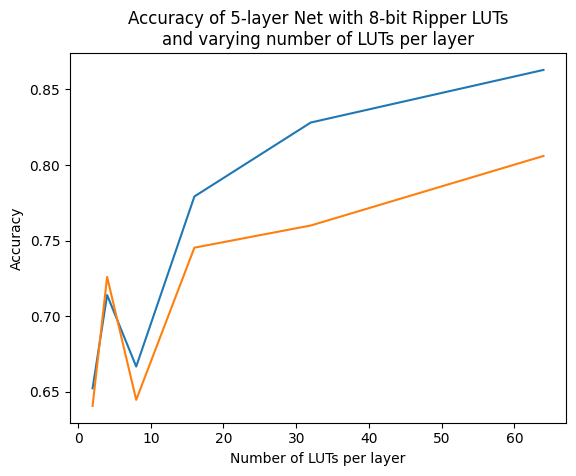

In [5]:
# experiment: accuracies with changing number of LUTs per hidden layer

num_layers = 5
nums_layer_luts = [2, 4, 8, 16, 32, 64] #, 128, 256, 512, 1024, 2048, 4096]
nums_lut_bits = 8

train_accuracies = []
test_accuracies = []
for num_layer_luts in nums_layer_luts:
    ripper_net = RipperLut(bits=[nums_lut_bits] * (num_layers + 1), hidden_layers=[num_layer_luts] * num_layers, verbose=False, mode='ripper')

    preds_train = ripper_net.train(X_train, y_train)
    preds_test = ripper_net.predict(X_test)

    train_accuracy = accuracy_score(preds_train, y_train)
    test_accuracy = accuracy_score(preds_test, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"{num_layer_luts} LUTs per layer: Accuracy on training set: {train_accuracy:.2f}")
    print(f"{num_layer_luts} LUTs per layer: Accuracy on test set: {test_accuracy:.2f}")
    

plt.plot(nums_layer_luts, train_accuracies, label="Train")
plt.plot(nums_layer_luts, test_accuracies, label="Test")
plt.title("Accuracy of 5-layer Net with 8-bit Ripper LUTs\nand varying number of LUTs per layer")
plt.xlabel("Number of LUTs per layer")
plt.ylabel("Accuracy")
plt.show()

In [6]:
# experiment: accuracies with changing number of input bits per LUT

num_layers = 5
num_layer_luts = 512 # 1024 takes too long
nums_lut_bits = [2, 4, 8] #, 16]

train_accuracies = []
test_accuracies = []
for num_lut_bits in nums_lut_bits:
    ripper_net = RipperLut(bits=[num_lut_bits] * (num_layers + 1), hidden_layers=[num_layer_luts] * num_layers, verbose=False, mode='ripper')

    preds_train = ripper_net.train(X_train, y_train)
    preds_test = ripper_net.predict(X_test)

    train_accuracy = accuracy_score(preds_train, y_train)
    test_accuracy = accuracy_score(preds_test, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"{num_lut_bits} bits per LUT: Accuracy on training set: {train_accuracy:.2f}")
    print(f"{num_lut_bits} bits per LUT: Accuracy on test set: {test_accuracy:.2f}")
    
    
plt.plot(nums_lut_bits, train_accuracies, label="Train")
plt.plot(nums_lut_bits, test_accuracies, label="Test")
plt.title("Accuracy of 5-layer Net with 1024 Ripper LUTs per layer\nand varying number of input bits per LUT")
plt.xlabel("Number of input bits per LUT")
plt.ylabel("Accuracy")
plt.show()

ripper.py: .fit | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.

base.py: .predict | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.

ripper.py: .fit | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.

base.py: .predict | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.

ripper.py: .fit | base.py: ._check_allpos_allneg: RuntimeWarning: 
Rules

2 bits per LUT: Accuracy on training set: 0.72
2 bits per LUT: Accuracy on test set: 0.69
4 bits per LUT: Accuracy on training set: 0.81
4 bits per LUT: Accuracy on test set: 0.78


Process SpawnPoolWorker-163:
Process SpawnPoolWorker-164:
Process SpawnPoolWorker-166:
Process SpawnPoolWorker-165:
Process SpawnPoolWorker-162:
Process SpawnPoolWorker-168:
Process SpawnPoolWorker-167:
Process SpawnPoolWorker-161:
Traceback (most recent call last):
  File "/Users/Tonni/miniforge3/envs/rule-net/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/Tonni/miniforge3/envs/rule-net/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Tonni/miniforge3/envs/rule-net/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/Users/Tonni/miniforge3/envs/rule-net/lib/python3.10/multiprocessing/pool.py", line 51, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "/Users/Tonni/Desktop/practical-work-code/rule-net/ripper_lut_net.py", line 80, in get_ripper
    ripper_clf.fit(input_bits_df, outp

KeyboardInterrupt: 